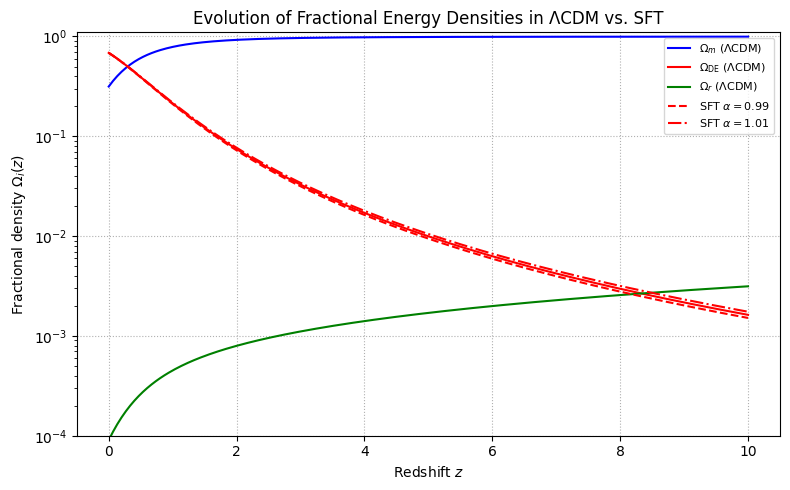

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Cosmological parameters (2025 SFT baseline) ---
Omega_m0, Omega_r0, Omega_DE0 = 0.31500, 9.034e-5, 0.68491

# --- Define E_SFT (dimensionless Hubble function) ---
def E_SFT(z, alpha):
    a = 1.0 / (1.0 + z)
    return np.sqrt(
        Omega_m0 * (1 + z)**3 +
        Omega_r0 * (1 + z)**4 +
        Omega_DE0 * a**(3.0 * (1.0 - alpha))
    )

# --- Compute fractional densities ---
def Omegas(z, alpha):
    E2 = E_SFT(z, alpha)**2
    Om = Omega_m0 * (1 + z)**3 / E2
    Or = Omega_r0 * (1 + z)**4 / E2
    Ode = Omega_DE0 * (1 + z)**(-3 * (1 - alpha)) / E2
    return Om, Or, Ode

# --- Redshift grid and models ---
z_vals = np.linspace(0, 10, 300)
Omegas_LCDM = np.array([Omegas(z, 1.00) for z in z_vals])
Omegas_quint = np.array([Omegas(z, 0.99) for z in z_vals])
Omegas_phant = np.array([Omegas(z, 1.01) for z in z_vals])

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(z_vals, Omegas_LCDM[:,0], 'b-', label=r'$\Omega_m$ (ΛCDM)')
plt.plot(z_vals, Omegas_LCDM[:,2], 'r-', label=r'$\Omega_{\mathrm{DE}}$ (ΛCDM)')
plt.plot(z_vals, Omegas_LCDM[:,1], 'g-', label=r'$\Omega_r$ (ΛCDM)')
plt.plot(z_vals, Omegas_quint[:,2], 'r--', label=r'SFT $\alpha=0.99$')
plt.plot(z_vals, Omegas_phant[:,2], 'r-.', label=r'SFT $\alpha=1.01$')
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"Fractional density $\Omega_i(z)$")
plt.ylim(1e-4, 1.1)
plt.yscale('log')
plt.title(r"Evolution of Fractional Energy Densities in ΛCDM vs. SFT")
plt.legend(loc='best', fontsize=8)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()
